In [286]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [287]:
# Het aantal clusters
# Het resultaat wordt een plaatje met slechts 5 kleuren 
# (de meest dominante kleuren)
k = 2

In [288]:
afbeelding1 = cv.imread('kodak dataset/kodim01.png')
afbeelding2 = cv.imread('kodak dataset/kodim05.png')
afbeelding3 = cv.imread('kodak dataset/kodim03.png')

In [289]:
# converteer de BGR waarden
# naar RGB zodat matplotlib ermee kan werken
afbeelding1 = cv.cvtColor(afbeelding1, cv.COLOR_BGR2RGB)
afbeelding2 = cv.cvtColor(afbeelding2, cv.COLOR_BGR2RGB)
afbeelding3 = cv.cvtColor(afbeelding3, cv.COLOR_BGR2RGB)

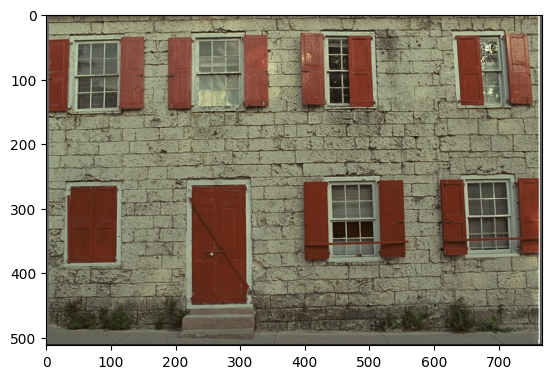

In [290]:
plt.imshow(afbeelding1)
plt.show()

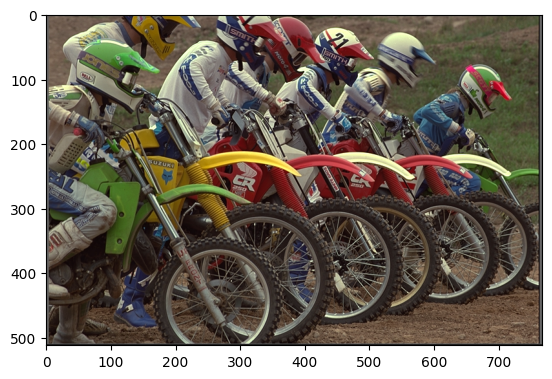

In [291]:
plt.imshow(afbeelding2)
plt.show()

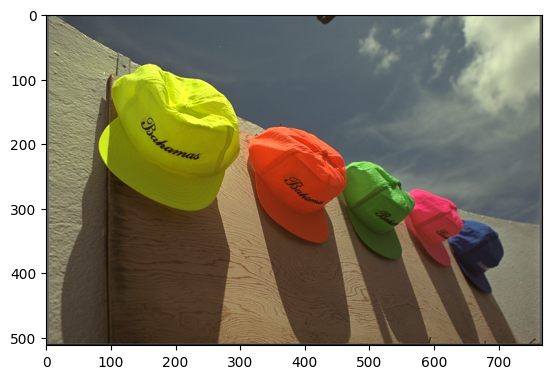

In [292]:
plt.imshow(afbeelding3)
plt.show()

In [293]:
# Hoe groot is de afbeelding? Je ziet dat
# deze afbeelding drie kleur kanalen heeft (laatste cijfer)
print('afbeelding1.shape',afbeelding1.shape)
print('afbeelding2.shape',afbeelding2.shape)
print('afbeelding3.shape',afbeelding3.shape)


afbeelding1.shape (512, 768, 3)
afbeelding2.shape (512, 768, 3)
afbeelding3.shape (512, 768, 3)


In [294]:
# Schaal de afbeelding naar een 2D array 
# met pixels en 3 kleur waarden (RGB)
pixel_values = afbeelding1.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [295]:
print(pixel_values.shape)

(393216, 3)


In [296]:
# define stopping criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [297]:
# number of clusters (K)

_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

In [298]:
print(labels.shape)

(393216, 1)


In [299]:
# convert back to 8 bit values
centers = np.uint8(centers)
print(centers)
# flatten the labels array
labels = labels.flatten()

[[ 93  69  54]
 [145 146 120]]


In [300]:
print(centers[0])
print(centers[1])

[93 69 54]
[145 146 120]


In [301]:
print(labels[0:10])
print(centers[labels[0:10]])

[0 0 0 0 0 0 0 0 0 0]
[[93 69 54]
 [93 69 54]
 [93 69 54]
 [93 69 54]
 [93 69 54]
 [93 69 54]
 [93 69 54]
 [93 69 54]
 [93 69 54]
 [93 69 54]]


In [302]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [303]:
# convert all pixels to the color of the centroids
segmented_image_flat = centers[labels]

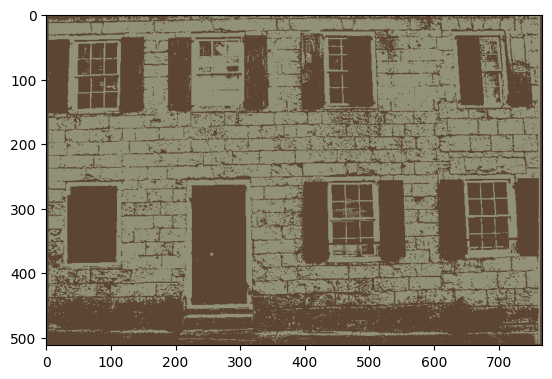

In [304]:
# schaal de kleur waarden terug naar de originele afbeelding
segmented_image = segmented_image_flat.reshape(afbeelding1.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

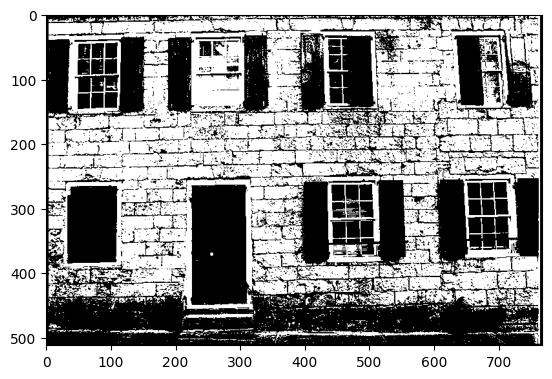

In [305]:
# begin mask
grijs = cv.cvtColor(segmented_image,cv.COLOR_RGB2GRAY)
# maskA = np.ones([512, 768])
maskA = grijs > 100
plt.imshow(grijs, cmap='gray')
plt.show()
# Hier selecteren we een gebied dat we zwart maken (0)
# maskA[250:400,400:550]=0

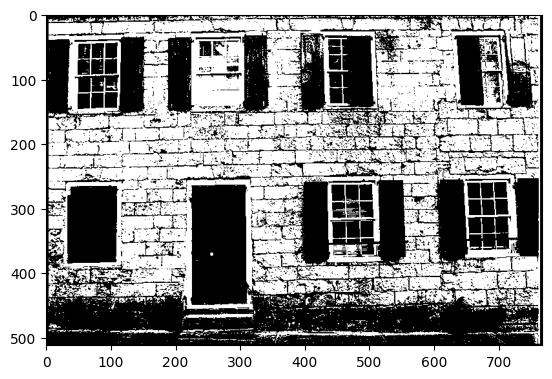

In [306]:
plt.imshow(maskA,cmap='gray')
plt.show()
# Elk afzonderlijk kleur kanaal 
# gaan we met het masker vermenigvuldigen
afbeelding2_masked = np.copy(afbeelding2)
afbeelding2_masked[:, :, 0] = afbeelding2_masked[:, :, 0] * maskA
afbeelding2_masked[:, :, 1] = afbeelding2_masked[:, :, 1] * maskA
afbeelding2_masked[:, :, 2] = afbeelding2_masked[:, :, 2] * maskA


In [307]:
# inverteer het masker en maak het binair
maskB = maskA!=1

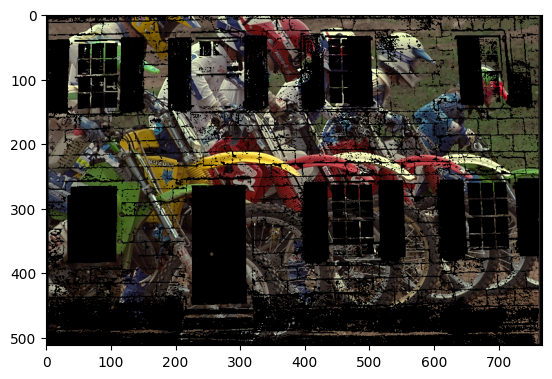

In [308]:
# Het resultaat is een mask over het originele image
plt.imshow(afbeelding2_masked)
plt.show()

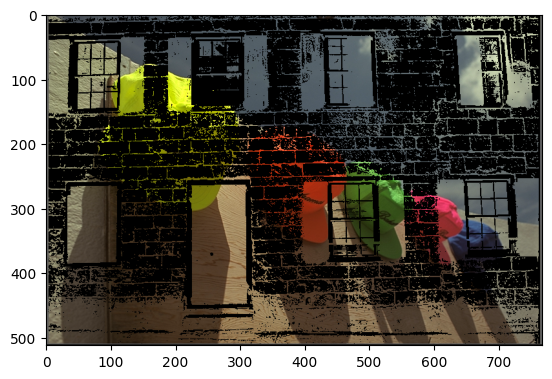

In [309]:
#•	Maskeer een andere afbeelding (afbeelding B) met dit mask (Mask A). 
afbeelding3_masked = np.copy(afbeelding3)
afbeelding3_masked[:,:,0] = afbeelding3_masked[:,:,0]*maskB
afbeelding3_masked[:,:,1] = afbeelding3_masked[:,:,1]*maskB
afbeelding3_masked[:,:,2] = afbeelding3_masked[:,:,2]*maskB
plt.imshow(afbeelding3_masked)
plt.show()

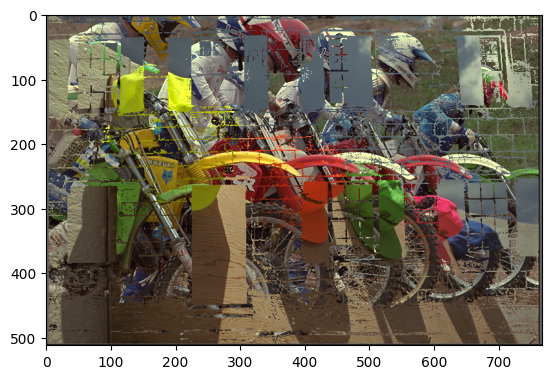

In [310]:
afbeelding4 = afbeelding2_masked + afbeelding3_masked
plt.imshow(afbeelding4)
plt.show()